# Setup: Import the Libraries

Run this code cell to import the libraries you may need to use in the task. You may also import other modules, as long as they are part of the Python Standard Library. https://docs.python.org/3/library/

You are **NOT** allowed to import any other external libraries (e.g., sklearn).

In [2]:
import numpy as np
import pandas as pd
import scipy.sparse as sparse
from scipy import stats

# Task 0: Data Loading
We use **Twitter US Airline Sentiment** for the sentiment analysis task. This dataset contains Twitter data on US airlines dating back to February of 2015 that's already been classified based on sentiment class (positive, neutral, negative), including roughly 15,000 tweets pertaining to about six different commercial airlines. 

## Download the Dataset
Run this code cell with these `!wget` Linux commands to connect and login to the COMP2211 course server and download the datasets. Modify the *--user=username* portion with your CSD username. The output will prompt you to enter your CSD password and will not be saved in Google Colab. **Remember to comment out this section before downloading it as .py for ZINC submission**.

In [ ]:
!wget --user=username --ask-password https://course.cse.ust.hk/comp2211/assignments/pa1/data/Tweets.csv
!wget --user=username --ask-password https://course.cse.ust.hk/comp2211/assignments/pa1/data/train_dataset.npz
!wget --user=username --ask-password https://course.cse.ust.hk/comp2211/assignments/pa1/data/test_dataset.npz
!wget --user=username --ask-password https://course.cse.ust.hk/comp2211/assignments/pa1/data/train_labels.npy
!wget --user=username --ask-password https://course.cse.ust.hk/comp2211/assignments/pa1/data/test_labels.npy

## Data Loading with Pandas
### Pandas
[Pandas](https://pandas.pydata.org/) is an open-source library, which provides high-performance, fast, easy-to-use data structures, and data analysis tools for manipulating numeric data and time series. In Pandas, we can import data from various file formats like *JSON*, *SQL*, *Microsoft Excel*, etc.

### Pandas vs. Numpy
In this task, we use Pandas to load the data instead of Numpy. So what are the differences between Pandas and Numpy? And which one is preferable?

Generally, Pandas offers powerful tools in the form of **DataFrames** and **Series**, while NumPy's main strength lies in its powerful **array manipulation** capabilities. The basic idea of choice between them is that:
- When we work on **tabular data**, we prefer the **Pandas** module.
- When we work on **numerical data**, we prefer the **Numpy** module.

Next, we will load the *csv*-format data by calling the *read_csv()* function of Pandas.

In [ ]:
df = pd.read_csv('./Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


From the above, we can see the first 5 rows
of the dataset. Each row represents one data sample, that is, one airline review on Twitter. Among the 15 columns, the column *airline_sentiment* is the sentiment for the data sample (positive, neutral, negative), while the column *text* contains the specific text in the corresponding tweets. In our sentiment analysis task, we will only use these two columns. Specifically, the column *text* is used as the features for the data. And the column *airline_sentiment* is the label for the data, i.e., the final prediction goal attribute.

In [ ]:
df = df[['text','airline_sentiment']]
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


## Data Loading with Numpy
After pre-processing (including removing the duplicates, cleaning the text data, creating the vector representations of the data, and train-test splitting) of the above Pandas data, we provide you with the following datasets:

- *train_dataset.npz* is a sparse matrix, which we will further convert to a Numpy 2D array with shape $(900, 2642)$, where $900$ is the number of training data samples, and $2642$ is the dimension of each data point. The matrix represents the features of training data, which are related to the word frequency.

- *test_dataset.npz* is a sparse matrix, which we will further convert to a Numpy 2D array with shape $(100, 2642)$, where $100$ is the number of test data samples, and $2642$ is the dimension of each data point. The matrix represents the features of test data, which are related to the word frequency.

- *train_labels.npy* is a Numpy 1D array with shape $(900, )$. The array represents the class labels for the training data samples, i.e., each element is an integer from $\{0,1,2\}$, representing the index of the sentiment class (positive, neutral, or negative).

- *test_labels.npy* is a Numpy 1D array with shape $(100, )$. The array represents the class labels for the text data samples, i.e., each element is an integer from $\{0,1,2\}$, representing the index of the sentiment class (positive, neutral, or negative).

You can load the datasets by the following code cell.

In [ ]:
train_dataset = sparse.load_npz("train_dataset.npz")
test_dataset = sparse.load_npz("test_dataset.npz")
train_dataset = train_dataset.toarray()
test_dataset = test_dataset.toarray()
train_labels = np.load("train_labels.npy")
test_labels = np.load("test_labels.npy")

**Note**: the above datasets are provided for you to self-test and debug your codes. In ZINC grading, we will use other datasets to grade your submissions in order to test the generality and robustness, as well as to prevent hard code. <mark>Therefore, please do NOT hard code any variable inside your function</mark>, for example, the number of data samples, the dimension of data points, the number of classes, etc.

# Task 1: K-Nearest Neighbors Classifier
Since we don't expect you to have Object-Oriented Programming background, we have implemented the class-related functions for you. 

These are the class attributes of *KNNModel*. They can be accessed within all of the functions defined inside *KNNModel*: \
*self.k*: K value for the K-Nearest Neighbors Classifier. \
*self.p*: $p$ value for computing the distance metric. Please refer to Task 1.1. \
*self.train_dataset*: The training dataset with shape (*num_train_samples*, *dimension*). \
*self.train_labels*: The class labels of the training dataset with shape (*num_train_samples*, ). \

Hint: Use Numpy broadcasting for efficient and concise code. \
https://numpy.org/doc/stable/user/basics.broadcasting.html \

Common Numpy array shape manipulation functions for your reference: \
https://numpy.org/doc/stable/reference/generated/numpy.reshape.html \
https://numpy.org/doc/stable/reference/generated/numpy.transpose.html \
https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html \
https://numpy.org/doc/stable/reference/generated/numpy.squeeze.html \

https://numpy.org/doc/stable/reference/generated/numpy.zeros.html \
https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html \
https://numpy.org/doc/stable/reference/generated/numpy.ones.html \
https://numpy.org/doc/stable/reference/generated/numpy.ones_like.html

## Task 1.1: Compute the Distance Metric
We use the **Minkowski distance** as our distance metric. The Minkowski distance of order $p$ (where $p$ is an integer) between two points $\mathbf{x}^{train}=(x_1^{train},\dots,x_i^{train},\dots)$ and $\mathbf{x}^{test}=(x_1^{test},\dots,x_i^{test},\dots)$ is defined as

$\text{Minkowski Distance}(\mathbf{x}^{train}, \mathbf{x}^{test})=(\sum_{i}|x^{train}_i-x_i^{test}|^p)^{\frac{1}{p}}$.

Note that the Euclidean distance is represented by this formula when $p=2$.

In this sub-task, you need to implement the function *compute_Minkowski_distance(self, test_dataset)*.

<mark> Return a Numpy 2D array with shape *(num_test_samples, num_train_samples)*</mark>, containing the Minkowski distance between each test data sample and each train data sample.

Hint: You may use Numpy's *expand_dims()*, *power()*, *sum()* functions.

https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html

https://numpy.org/doc/stable/reference/generated/numpy.power.html

https://numpy.org/doc/stable/reference/generated/numpy.sum.html

## Task 1.2: Find K-Nearest Neighbor Labels
Implement the function *find_k_nearest_neighbor_labels(self, test_dataset)*.

<mark>Return a Numpy 2D array with shape *(num_test_samples, self.k)*</mark>, containing the labels of the K-Nearest Neighbors of *test_dataset*:

Hint 1: *test_dataset* has shape *(num_test_samples, dimension)*.

Hint 2: You may call *self.compute_Minkowski_distance()* to reuse your function from Task 1.1.

Hint 3: You may use Numpy's *argsort(), take()* functions.

https://numpy.org/doc/stable/reference/generated/numpy.argsort.html

https://numpy.org/doc/stable/reference/generated/numpy.take.html

## Task 1.3: Predict Label for Test Data
Implement the function *predict(self, test_dataset)*. For the sake of simplicity, if there is a tie, please break the tie by following the numerical order, i.e., choosing the smallest index that has the maximum count.

<mark>Return the predicted labels (integer value from $0$ to *num_classes*$-1$) of *test_dataset* as a Numpy 1D array with shape *(num_test_samples, )*</mark>.

Hint 1: *test_dataset* has shape *(num_test_samples, dimension)*.

Hint 2: *num_classes* is the maximum number in *self.train_labels* + 1 since the class index starts from $0$.

Hint 3: You may call *self.find_k_nearest_neighbor_labels()* to reuse your function from Task 1.2.

Hint 4: You may use Numpy's *amax()* function.

Hint 5: You may use Scipy's *stats.mode()* function to get the mode of an array. But *stats.mode()* is unnecessary, since you can also get the mode of an array with Numpy only.

https://numpy.org/doc/stable/reference/generated/numpy.amax.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html

## Tasks 1.1 - 1.3 Code Cell:

In [ ]:
class KNNModel:
  def __init__(self, k, p):
    self.k = k
    self.p = p

  def fit(self, train_dataset, train_labels):
    self.train_dataset = train_dataset # shape: (num_train_samples, dimension)
    self.train_labels = train_labels # shape: (num_train_samples, )

  def compute_Minkowski_distance(self, test_dataset):
    # TODO
    # return dist # shape: (num_test_samples, num_train_samples)
    pass  # delete this line when you write your code

  def find_k_nearest_neighbor_labels(self, test_dataset):
    # TODO
    # return k_nearest_neighbor_labels # shape: (num_test_samples, self.k)
    pass  # delete this line when you write your code

  def predict(self, test_dataset):
    # TODO
    # return test_predict # shape: (num_test_samples, )
    pass  # delete this line when you write your code

# Task 2: Evaluation Metrics

To evaluate the KNN classifier, we use *accuracy*, *Macro Average Precision*, *Macro Average Recall*, *Macro-$F_1$ score*, and *Mattheus Correlation Coefficient* as the evaluation metrics. To compute these metrics more conveniently, we need to get the confusion matrix first.

## Task 2.1: Confusion Matrix

A confusion matrix is a table that summarizes the predictions and actual labels of classification. For the multi-class classification, we can have a binary confusion matrix for each class. But for convenience, we can alternatively have one confusion matrix with shape (*num_classes*, *num_classes*) that records the number of occurrences between the predictions and actual labels. The classes are listed in the same order in the rows as in the columns, therefore the correctly classified elements are located on the main diagonal from top left to bottom right and they correspond to the number of times the two raters agree. 

There are four important concepts regarding the confusion matrix: true positive, true negative, false positive and false negative. For each class $j$, denote $TP_j$, $TN_j$, $FP_j$, $FN_j$, as the instance numbers of true positive, true negative, false positive and false negative, whose definitions are as follows:
- True positive: A test result that correctly indicates the presence of a condition or characteristic.
- True negative: A test result that correctly indicates the absence of a condition or characteristic.
- False positive: A test result that wrongly indicates that a particular condition or attribute is present.
- False negative: A test result that wrongly indicates that a particular condition or attribute is absent.

Please refer to the [Wikipedia page](https://en.wikipedia.org/wiki/Confusion_matrix) for details if interested. 

Next, we will use an example to illustrate the confusion matrix.

***

### <font color='blue'>Example</font> 😉
Suppose there are $4$ classes $\{a, b, c, d\}$ and $52$ test samples. The figure below shows one example of the confusion matrix.

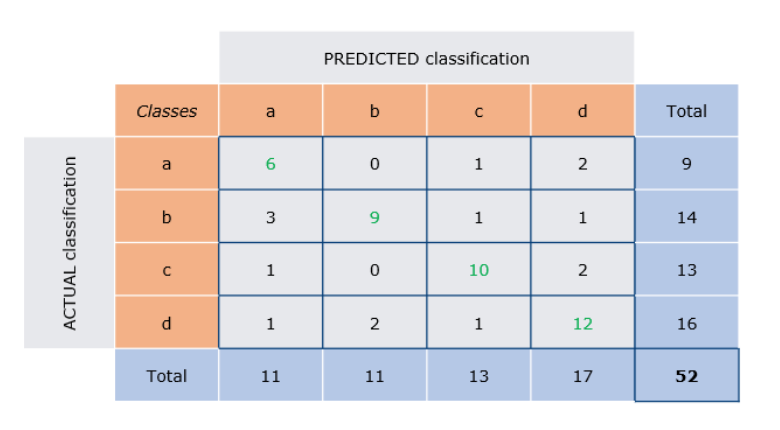

Next, we show the computation details of class $b$ as an example. The TP, TN, FP, FN of other classes can be calculated in the same way.

- First, from the confusion matrix, we can directly see that $9$ samples are correctly predicted as class $b$, that is, there are $9$ samples that have class $b$ as label as well as prediction. So the TP of class $b$ is 9.

- Then for FP, we need to count how many samples are wrongly predicted as class $b$, that is, how many samples whose label is not class $b$ but the prediction is class $b$. That's the sum of the second column except for the diagonal element: $0+0+2=2$. So the FP of class $b$ is 2.

- Then for FN, we need to count how many samples are wrongly predicted as not being class $b$, that is, how many samples whose label is class $b$ but the prediction is not class $b$. That's the sum of the second row except for the diagonal element: $3+1+1=5$. So the FN of class $b$ is 5.

- At last, for TN, we need to count how many samples are correctly predicted as not being class $b$, that is, how many samples whose label is not class $b$ and the prediction is not class $b$. That's the sum of the whole table except for the second row and the second column: $6+1+2+1+10+2+1+1+12=36$. So the TN of class $b$ is 36.

The figure below shows the TP, FP, FN, TN entries of class b in the confusion matrix.

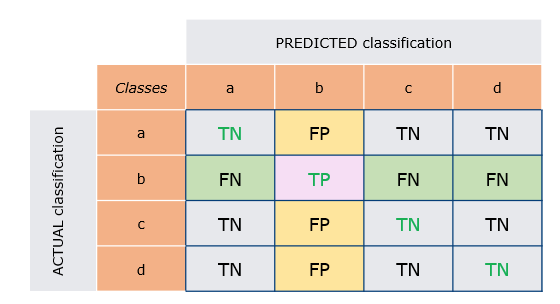

***

For our implementation of *generate_confusion_matrix(test_predict, test_labels)*, you need to <mark>return a Numpy array with shape *(num_classes, num_classes)*</mark>, representing the multi-class confusion matrix as the above example shows.

Hint 1: Both *test_predict* and *test_labels* are Numpy 1D arrays with shape (*num_test_samples*, ).

Hint 2: *num_classes* is the maximum number in *test_labels* + 1 since the class index starts from $0$.

Hint 3: You may use Numpy's *amax()*, *zeros()*, *sum()* function.

Hint 4: Keep the index of the classes consistent between the returned arrays and *test_labels*.

https://numpy.org/doc/stable/reference/generated/numpy.amax.html

https://numpy.org/doc/stable/reference/generated/numpy.zeros.html

https://numpy.org/doc/stable/reference/generated/numpy.sum.html

## Task 2.2: Accuracy
Implement *calculate_accuracy(test_predict, test_labels)* to return the accuracy score.

In terms of the multi-class confusion matrix, the accuracy formula is:

$Accuracy=\frac{\sum_{i=1}^NTP_i}{\text{num_samples}}$,

where $N$ is the number of classes.

Hint 1: You may call the *generate_confusion_matrix()* function from Task 2.1.

Hint 2: You may use Numpy's *diagonal()* and *sum()* functions.

https://numpy.org/doc/stable/reference/generated/numpy.diagonal.html

https://numpy.org/doc/stable/reference/generated/numpy.sum.html

## Task 2.3: Macro Average Precision
Implement *calculate_precision(test_predict, test_labels)* to return the macro average precision score.

In terms of the multi-class confusion matrix, the macro average precision formula is:

$MacroAveragePrecision=\frac{\sum_{i=1}^NPrecision_i}{N}$,

where $N$ is the number of classes, while $Precision_i$ is the precision for class $i$,

$Precision_i=\frac{TP_i}{TP_i+FP_i}$.

Hint 1: You may call the *generate_confusion_matrix()* function from Task 2.1.

Hint 2: You may use Numpy's *diagonal()*, *sum()*, *average()* functions.

https://numpy.org/doc/stable/reference/generated/numpy.diagonal.html

https://numpy.org/doc/stable/reference/generated/numpy.sum.html

https://numpy.org/doc/stable/reference/generated/numpy.average.html

## Task 2.4: Macro Average Recall
Implement *calculate_recall(test_predict, test_labels)* to return the macro average recall score.

In terms of the multi-class confusion matrix, the macro average recall formula is:

$MacroAverageRecall=\frac{\sum_{i=1}^NRecall_i}{N}$,

where $N$ is the number of classes, while $Recall_i$ is the recall for class $i$,

$Recall_i=\frac{TP_i}{TP_i+FN_i}$.

Hint 1: You may call the *generate_confusion_matrix()* function from Task 2.1.

Hint 2: You may use Numpy's *diagonal()*, *sum()*, *average()* functions.

https://numpy.org/doc/stable/reference/generated/numpy.diagonal.html

https://numpy.org/doc/stable/reference/generated/numpy.sum.html

https://numpy.org/doc/stable/reference/generated/numpy.average.html

### A Note on Precision and Recall
From Tasks 2.3 and 2.4, you may find that the formulas of Precision and Recall look very similar. They only differ in the denominators, where Precision calculates the fraction of TP among TP and FP, while Recall calculates the fraction of TP among TP and FN. Intuitively, Precision tells us how much we can trust the model when it predicts an individual sample as Positive for some class label. Recall measures the ability of the model to find all the Positive samples in the dataset for some class label. You may refer to the following figure to have a visualization on Precision and Recall. Here *relevant elements* represents the groundtruth label being positive and *retrieved elements* represents the prediction being positive.

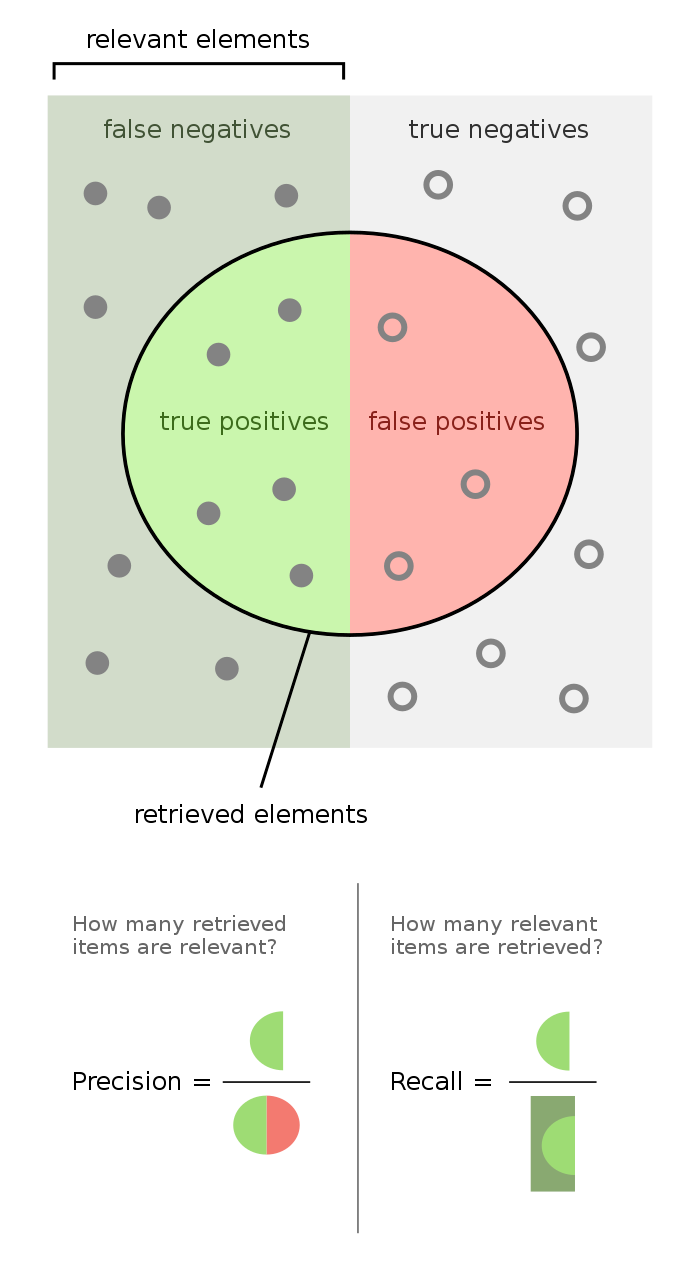

## Task 2.5: Macro-$F_1$ Score
Implement *calculate_macro_f1(test_predict, test_labels)* to return the macro-$F_1$ score.

The macro-$F_1$ score is defined as the harmonic mean of Macro Average Precision and Macro Average Recall:

$\text{Macro-}F_1=2\cdot\frac{MacroAveragePrecision\cdot MacroAverageRecall}{MacroAveragePrecision+MacroAverageRecall}$.

Hint : You may call the *calculate_precision()* and *calculate_recall()* functions from Task 2.3 & 2.4.

## Task 2.6: Matthews Correlation Coefficient
Implement *calculate_MCC_score(test_predict, test_labels)* to return the Matthews Correlation Coefficient score.

In terms of the multi-class confusion matrix, the MCC formula is:

$MCC=\frac{\sum_{i=1}^NTP_i\cdot\text{num_samples}-\sum_{i=1}^N(TP_i+FP_i)\cdot(TP_i+FN_i)}{\sqrt{(\text{num_samples}^2-\sum_{i=1}^N(TP_i+FP_i)^2)\cdot(\text{num_samples}^2-\sum_{i=1}^N(TP_i+FN_i)^2)}}$,

where $N$ is the number of classes.

Hint 1: You may call the *generate_confusion_matrix()* function from Task 2.1.

Hint 2: You may use Numpy's *diagonal()*, *sum()*, *power()*, *sqrt()* functions.

https://numpy.org/doc/stable/reference/generated/numpy.diagonal.html

https://numpy.org/doc/stable/reference/generated/numpy.sum.html

https://numpy.org/doc/stable/reference/generated/numpy.power.html

https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html

## Tasks 2.1 - 2.6 Code Cell:

In [ ]:
def generate_confusion_matrix(test_predict, test_labels):
  # TODO
  # return confusion_matrix # shape: (num_classes, num_classes)
  pass  # delete this line when you write your code


def calculate_accuracy(test_predict, test_labels):
  # TODO
  # return accuracy # dtype: float
  pass  # delete this line when you write your code


def calculate_precision(test_predict, test_labels):
  # TODO
  # return precision # dtype: float
  pass  # delete this line when you write your code


def calculate_recall(test_predict, test_labels):
  # TODO
  # return recall # dtype: float
  pass  # delete this line when you write your code


def calculate_macro_f1(test_predict, test_labels):
  # TODO
  # return macro_f1 # dtype: float
  pass  # delete this line when you write your code


def calculate_MCC_score(test_predict, test_labels):
  # TODO
  # return MCC_score # dtype: float
  pass  # delete this line when you write your code

# Task 3: D-Fold Cross-Validation

For the sake of simplicity, we will implement our *DFoldCV* module to only handle our *KNNModel*, with the set of possible *K* values and $p$ values provided as input tuples, and *D* provided as an input integer.

Below are the class attributes of *DFoldCV*. They can be accessed within all of the functions defined inside *DFoldCV*: \
*self.X*: The validation dataset with shape (*num_validation_samples*, *dimension*). \
*self.y*: The labels of the validation dataset with shape (*num_validation_samples*, ). \
*self.k_list*: A Python list of *K* values for *K-Nearest Neighbors Classifier* to validate (find the optimal) with *D-Fold Cross-Validation*. \
*self.p_list*: A Python list of *p* values for Minkowski distance order to validate (find the optimal) with *D-Fold Cross-Validation*. \
*self.d*: The value of *D* for *D-Fold Cross-Validation*. \
*self.eval_metric*: The evaluation metric function for *D-Fold Cross-Validation*.

## Task 3.1: Generate Folds

Given the value of *D*, we can split our validation dataset into *D* splits. For each of the *D* folds, the training set should be comprised of $D - 1$ splits, with the testing set comprised of the leftover split. Implement the function *generate_folds(self)* to return the appropriate training and testing sets accordingly. For the sake of simplicity, we don't need to shuffle the dataset when generating the *D* folds.

<mark>Return requirements:</mark> \
*train_d_folds*: Python list of length *D*, with each element being a Numpy array of shape ($\frac{D-1}{D} \cdot$*num_validation_samples*, *dimension + 1*). In each array, the first *dimension* columns represent the features, while the last column represents the label. \
*test_d_folds*: Python list of length *D*, with each element being a Numpy array of shape ($\frac{1}{D} \cdot$*num_validation_samples*, *dimension + 1*) In each array, the first *dimension* columns represent the features, while the last column represents the label.

Hint: You may use Numpy's *concatenate()* and *array_split()* functions. *array_split()* is a convenient function to split Numpy arrays into lists, and automatically handles uneven divisions.

https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html

https://numpy.org/doc/stable/reference/generated/numpy.array_split.html

## Task 3.2: Cross-Validate

Implement the function *cross_validate(self)* to return the validation scores for each value of *K* in *self.k_list* and $p$ in *self.p_list* across each of the *D* folds. <mark>The expected return value is a Numpy 3D array with shape (*length of self.k_list*, *length of self.p_list*, *D*)</mark>.

Hint 1: You may reuse your code in Task 1, by calling *knn_model = KNNModel(k, p)* and *knn_model.func_name(parameters)*.

Hint 2: You may call *self.generate_folds()* to reuse your function from Task 3.1.

## Task 3.3: Validate Best Parameters

Implement the function *validate_best_parameters(self)*. Based on the validation scores we have calculated in Task 3.2, the overall score for parameter combination ($K$ and $p$) is simply the average evaluation metric score across all *D* folds. <mark>Choose and return the values of *K* and *p* with the highest overall score</mark>.

Hint 1: You may call *self.cross_validate()* to reuse your function from Task 3.2.

Hint 2: You may use Numpy's *average()*, *argmax()*, *unravel_index()* functions.

https://numpy.org/doc/stable/reference/generated/numpy.average.html

https://numpy.org/doc/stable/reference/generated/numpy.argmax.html

https://numpy.org/doc/stable/reference/generated/numpy.unravel_index.html

## Tasks 3.1 - 3.3 Code Cell:

In [ ]:
class DFoldCV:
  def __init__(self, X, y, k_list, p_list, d, eval_metric):
    self.X = X
    self.y = y
    self.k_list = k_list
    self.p_list = p_list
    self.d = d
    self.eval_metric = eval_metric

  def generate_folds(self):
    # TODO
    # return train_d_folds, test_d_folds # type: tuple
    pass  # delete this line when you write your code
  
  def cross_validate(self):
    # TODO
    # return scores # shape: (length of self.k_list, length of self.p_list, self.d)
    pass  # delete this line when you write your code

  def validate_best_parameters(self):
    # TODO
    # return k_best, p_best # type: tuple
    pass  # delete this line when you write your code

# Optional Task: Test Run
Use all the previously defined functions in Tasks 1 - 3 to perform the KNN classifier on our Twitter airline sentiment dataset. We provide some results for you to self-test your functions. Feel free to modify this code cell for your own testing and debugging purposes, which will not be graded.

In [7]:
# TODO Optional
if __name__ == '__main__':
  train_dataset = sparse.load_npz("train_dataset.npz")
  test_dataset = sparse.load_npz("test_dataset.npz")
  train_dataset = train_dataset.toarray()
  test_dataset = test_dataset.toarray()
  train_labels = np.load("train_labels.npy")
  test_labels = np.load("test_labels.npy")

  knn_model = KNNModel(10, 2)
  knn_model.fit(train_dataset, train_labels)
  dist = knn_model.compute_Minkowski_distance(test_dataset)
  print(f"The Minkowski distance between the first five test samples and the first five training samples are:\n {dist[ : 5, : 5]}") # should be [[1.40488545 1.41421356 1.40473647 1.41421356 1.40205505]
                                                                                                                                    #            [1.40172965 1.41421356 1.40153004 1.41421356 1.39793611]
                                                                                                                                    #            [1.40573171 1.41421356 1.40559629 1.41421356 1.40315911]
                                                                                                                                    #            [1.40403747 1.41421356 1.40387491 1.41421356 1.40094856]
                                                                                                                                    #            [1.41421356 1.39611886 1.41421356 1.39841935 1.41421356]]
  k_nearest_neighbor_labels = knn_model.find_k_nearest_neighbor_labels(test_dataset)
  print(f"The k nearest neighbor labels for the first five test samples are:\n {k_nearest_neighbor_labels[ : 5, :]}") # should be [[0 1 1 1 1 2 0 0 0 2]
                                                                                                                      #            [2 1 1 0 0 0 0 0 0 0]
                                                                                                                      #            [1 0 0 1 1 2 1 1 0 1]
                                                                                                                      #            [1 1 0 2 2 1 0 1 1 0]
                                                                                                                      #            [2 2 2 2 2 1 2 0 1 2]]
  test_predict = knn_model.predict(test_dataset)
  print(f"The predictions for test data are:\n {test_predict}") # should be [0 0 1 1 2 0 0 0 0 0 0 2 0 0 0 0 0 2 0 1 1 0 0 1 0 0 0 2 2 2 2 0 0 0 0 0 0
                                                                # 0 0 0 0 0 2 0 0 2 2 0 1 0 0 1 0 0 0 0 0 0 0 1 2 1 2 0 0 0 0 0 0 0 0 0 0 2
                                                                # 0 1 0 0 1 0 0 0 2 0 1 0 0 2 0 1 0 2 1 0 0 2 0 0 1 0]
  confusion_matrix = generate_confusion_matrix(test_predict, test_labels)
  print(f"The confusion matrix is:\n {confusion_matrix}") # should be [[48.  3.  1.]
                                                          #             [16. 11. 10.]
                                                          #             [ 4.  1.  6.]]
  accuracy = calculate_accuracy(test_predict, test_labels)
  print(f"The accuracy is: {accuracy}") # should be 0.65
  precision = calculate_precision(test_predict, test_labels)
  print(f"The macro average precision is: {precision}") # should be 0.5973856209150327
  recall = calculate_recall(test_predict, test_labels) 
  print(f"The macro average recall is: {recall}") # should be 0.5886095886095887
  macro_f1 = calculate_macro_f1(test_predict, test_labels)
  print(f"The macro f1 score is: {macro_f1}") # should be 0.5929651346720406
  MCC_score = calculate_MCC_score(test_predict, test_labels)
  print(f"The MCC score is: {MCC_score}") # should be 0.4182135132877802

  k_list = [5, 10, 15]
  p_list = [2, 4]
  d = 10
  dfoldcv = DFoldCV(train_dataset, train_labels, k_list, p_list, d, calculate_MCC_score)
  scores = dfoldcv.cross_validate()
  print(f"The scores for the first k value and the first p value: {scores[0, 0, :]}") # should be [0.35862701 0.44284459 0.32790457 0.39646162 0.21971336 0.3317104
                                                                                      #            0.27405523 0.3728344  0.391094   0.41420285]
  best_param = dfoldcv.validate_best_parameters()
  print(f"The best K value and p value are: {best_param}") # should be (10, 2)
  

The Minkowski distance between the first five test samples and the first five training samples are:
 [[1.40488545 1.41421356 1.40473647 1.41421356 1.40205505]
 [1.40172965 1.41421356 1.40153004 1.41421356 1.39793611]
 [1.40573171 1.41421356 1.40559629 1.41421356 1.40315911]
 [1.40403747 1.41421356 1.40387491 1.41421356 1.40094856]
 [1.41421356 1.39611886 1.41421356 1.39841935 1.41421356]]
The k nearest neighbor labels for the first five test samples are:
 [[0 1 1 1 1 2 0 0 0 2]
 [2 1 1 0 0 0 0 0 0 0]
 [1 0 0 1 1 2 1 1 0 1]
 [1 1 0 2 2 1 0 1 1 0]
 [2 2 2 2 2 1 2 0 1 2]]
The predictions for test data are:
 [0 0 1 1 2 0 0 0 0 0 0 2 0 0 0 0 0 2 0 1 1 0 0 1 0 0 0 2 2 2 2 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 2 2 0 1 0 0 1 0 0 0 0 0 0 0 1 2 1 2 0 0 0 0 0 0 0 0 0 0 2
 0 1 0 0 1 0 0 0 2 0 1 0 0 2 0 1 0 2 1 0 0 2 0 0 1 0]
The confusion matrix is:
 [[48.  3.  1.]
 [16. 11. 10.]
 [ 4.  1.  6.]]
The accuracy is: 0.65
The macro average precision is: 0.5973856209150327
The macro average recall is: 0.58860958